# Energy Consumption Analysis with Pruning
# 
This notebook loads a CSV file with experimental results and uses the `AnalysisPlotter` class to visualize the data.


In [1]:
import sys
import os

lib_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
if lib_path not in sys.path:
    sys.path.append(lib_path)

import pandas as pd
from PruneEnergyAnalizer import AnalysisPlotter,parse_model_name

In [3]:
# Load the CSV file
df = pd.read_csv("results_v18.csv")
df

,MODEL_NAME,BATCH_SIZE,Mean Time per Sample (s),FPS,STD Time per Sample (s),Mean Energy per Sample (J),STD Energy per Sample (J),Parameters,FLOPs
0,AlexNet_DATASET_random_PD1_GPR-45_PRUNED_SEED_...,1,0.001051,951.050459,8.149121e-05,0.176480,0.017662,19684806,234326646
1,AlexNet_DATASET_random_PD1_GPR-45_PRUNED_SEED_...,8,0.000143,6986.317633,2.247262e-05,0.036092,0.003658,19684806,1874613168
2,AlexNet_DATASET_random_PD1_GPR-45_PRUNED_SEED_...,16,0.000080,12517.014326,5.688501e-06,0.023516,0.001628,19684806,3749226336
3,AlexNet_DATASET_random_PD1_GPR-45_PRUNED_SEED_...,32,0.000064,15572.893992,5.565086e-07,0.019233,0.000754,19684806,7498452672
4,AlexNet_DATASET_random_PD1_GPR-45_PRUNED_SEED_...,64,0.000053,18695.209667,5.230126e-07,0.016532,0.000366,19684806,14996905344
...,...,...,...,...,...,...,...,...,...
325,AlexNet_DATASET_random_PD1_GPR-20_PRUNED_SEED_...,1,0.001142,875.545688,1.306459e-04,0.272282,0.036279,40026038,468902342
326,AlexNet_DATASET_random_PD1_GPR-20_PRUNED_SEED_...,8,0.000167,5985.722286,1.747937e-05,0.050303,0.005614,40026038,3751218736
327,AlexNet_DATASET_random_PD1_GPR-20_PRUNED_SEED_...,16,0.000119,8433.503900,9.069218e-08,0.036408,0.001931,40026038,7502437472
328,AlexNet_DATASET_random_PD1_GPR-20_PRUNED_SEED_...,32,0.000100,9959.311473,3.384769e-08,0.030444,0.000431,40026038,15004874944


In [7]:
df

,MODEL_NAME,BATCH_SIZE,Mean Time per Sample (s),FPS,STD Time per Sample (s),Mean Energy per Sample (J),STD Energy per Sample (J),Parameters,FLOPs,GPR,Architecture,Pruning Distribution
0,AlexNet_DATASET_random_PD1_GPR-45_PRUNED_SEED_...,1,0.001051,951.050459,8.149121e-05,0.176480,0.017662,19684806,234326646,45,AlexNet,PD1
1,AlexNet_DATASET_random_PD1_GPR-45_PRUNED_SEED_...,8,0.000143,6986.317633,2.247262e-05,0.036092,0.003658,19684806,1874613168,45,AlexNet,PD1
2,AlexNet_DATASET_random_PD1_GPR-45_PRUNED_SEED_...,16,0.000080,12517.014326,5.688501e-06,0.023516,0.001628,19684806,3749226336,45,AlexNet,PD1
3,AlexNet_DATASET_random_PD1_GPR-45_PRUNED_SEED_...,32,0.000064,15572.893992,5.565086e-07,0.019233,0.000754,19684806,7498452672,45,AlexNet,PD1
4,AlexNet_DATASET_random_PD1_GPR-45_PRUNED_SEED_...,64,0.000053,18695.209667,5.230126e-07,0.016532,0.000366,19684806,14996905344,45,AlexNet,PD1
...,...,...,...,...,...,...,...,...,...,...,...,...
325,AlexNet_DATASET_random_PD1_GPR-20_PRUNED_SEED_...,1,0.001142,875.545688,1.306459e-04,0.272282,0.036279,40026038,468902342,20,AlexNet,PD1
326,AlexNet_DATASET_random_PD1_GPR-20_PRUNED_SEED_...,8,0.000167,5985.722286,1.747937e-05,0.050303,0.005614,40026038,3751218736,20,AlexNet,PD1
327,AlexNet_DATASET_random_PD1_GPR-20_PRUNED_SEED_...,16,0.000119,8433.503900,9.069218e-08,0.036408,0.001931,40026038,7502437472,20,AlexNet,PD1
328,AlexNet_DATASET_random_PD1_GPR-20_PRUNED_SEED_...,32,0.000100,9959.311473,3.384769e-08,0.030444,0.000431,40026038,15004874944,20,AlexNet,PD1


In [6]:
df = parse_model_name(df)
df[["MODEL_NAME", "GPR", "Architecture", "Pruning Distribution"]]


,MODEL_NAME,GPR,Architecture,Pruning Distribution
0,AlexNet_DATASET_random_PD1_GPR-45_PRUNED_SEED_...,45,AlexNet,PD1
1,AlexNet_DATASET_random_PD1_GPR-45_PRUNED_SEED_...,45,AlexNet,PD1
2,AlexNet_DATASET_random_PD1_GPR-45_PRUNED_SEED_...,45,AlexNet,PD1
3,AlexNet_DATASET_random_PD1_GPR-45_PRUNED_SEED_...,45,AlexNet,PD1
4,AlexNet_DATASET_random_PD1_GPR-45_PRUNED_SEED_...,45,AlexNet,PD1
...,...,...,...,...
325,AlexNet_DATASET_random_PD1_GPR-20_PRUNED_SEED_...,20,AlexNet,PD1
326,AlexNet_DATASET_random_PD1_GPR-20_PRUNED_SEED_...,20,AlexNet,PD1
327,AlexNet_DATASET_random_PD1_GPR-20_PRUNED_SEED_...,20,AlexNet,PD1
328,AlexNet_DATASET_random_PD1_GPR-20_PRUNED_SEED_...,20,AlexNet,PD1


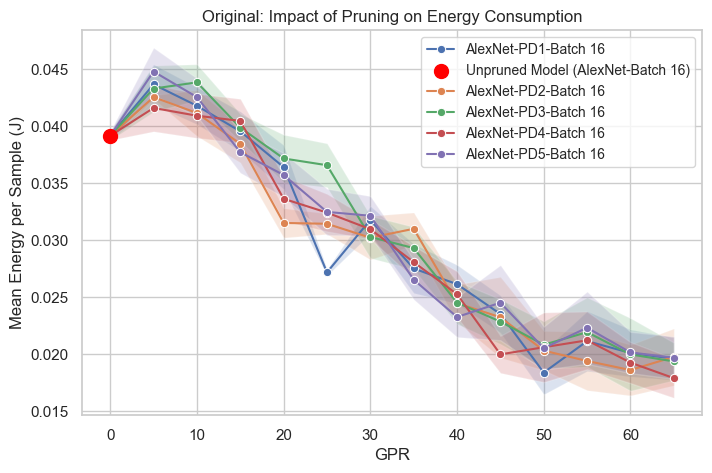

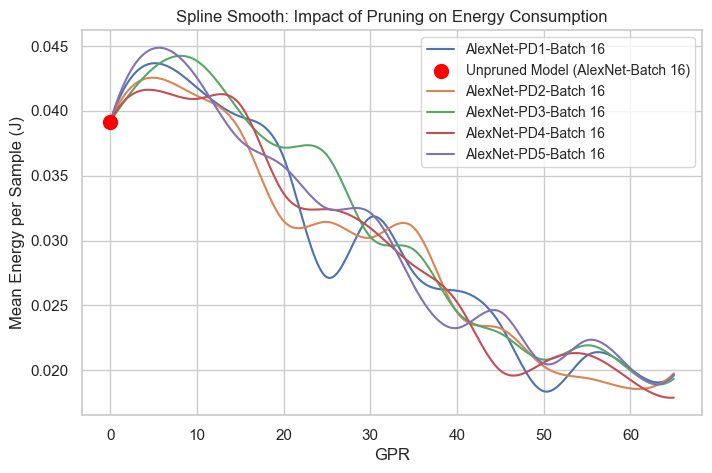

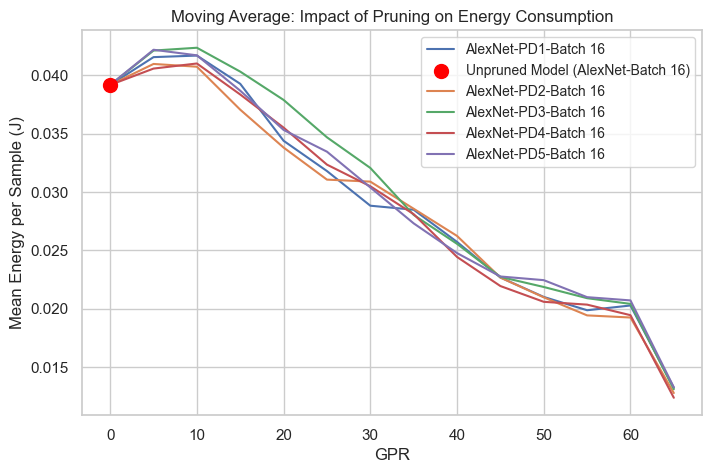

In [14]:



# Create an instance of AnalysisPlotter
plotter = AnalysisPlotter(
    dataframe=df, 
    x_column="GPR", 
    y_column="Mean Energy per Sample (J)", 
    title="Impact of Pruning on Energy Consumption"
)

# Generate the plot for a specific architecture, pruning distributions, and batch size
plotter.plot_data(
    architectures=["AlexNet"],
    pruning_distributions=["PD1", "PD2", "PD3", "PD4", "PD5"],
    batch_sizes=[16],
    patience=3,  # Number of iterations without significant improvement
    min_delta=0.05  # Minimum variation to consider stabilization
    )